In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
import matplotlib.pylab as plt
import pickle

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [8]:
df = pd.read_csv("../data/train_fft_final.csv")

In [9]:
df2 = df.copy()

features_drop = ['target','Unnamed: 0','ID','location']
X=df2.drop(features_drop,axis=1)
y=df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
knn = KNeighborsRegressor(n_neighbors=5, p=2, metric='minkowski', n_jobs=-1)
knn.fit(X_train, np.ravel(y_train))

KNeighborsRegressor(n_jobs=-1)

In [6]:
# Predict on test set
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

0.2838893785937002


In [8]:
np.sum((np.array(y_pred )-np.array(y_test))**2)**0.5/len(y_test)

0.5330789208202698

In [10]:
y_train_pred=knn.predict(X_train)
np.sum((np.array(y_train_pred )-np.array(y_train))**2)**0.5/len(y_train)

0.2747012530466662

In [23]:
def result_to_category(liste):
    
    list_category = []
    
    for i in liste:
        if  i < 13:
            c = "1"
            list_category.append(c)
        elif i >= 13 and i < 36:
            c = "2"
            list_category.append(c)
        elif i >= 36 and i < 56:
            c = "3"
            list_category.append(c)
        elif i >= 56 and i < 151:
            c = "4"
            list_category.append(c)
        elif i >= 151 and i < 250:
            c = "5"
            list_category.append(c)
        elif i >= 250:
            c = "6"
            list_category.append(c)
            
    return list_category

In [13]:
from sklearn.metrics import confusion_matrix

y_test_array=y_test.values

y_test_category=result_to_category(y_test_array)
y_pred_category=result_to_category(knn.predict(X_test))

confusion_matrix(y_test_category, y_pred_category)

array([[   3,   45,   25,   27,    0,    0],
       [   3,  400,  543,  323,    1,    0],
       [   0,  144,  792,  630,    7,    0],
       [   0,   45,  452, 1030,    7,    0],
       [   0,    1,   14,  116,   18,    0],
       [   0,    0,    0,   23,   13,    0]])

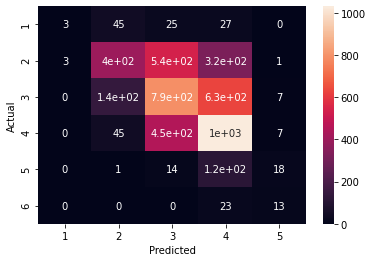

In [14]:
data = {'y_Actual':   y_test_category,
        'y_Predicted': y_pred_category
        }

df_matrix = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_matrix['y_Actual'], df_matrix['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [15]:
np.unique(y_pred_category)

array(['1', '2', '3', '4', '5'], dtype='<U1')

In [16]:
from sklearn.metrics import classification_report

df_matrix = classification_report(y_test_category,y_pred_category)
print('Classification report : \n',df_matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.03      0.06       100
           2       0.63      0.31      0.42      1270
           3       0.43      0.50      0.47      1573
           4       0.48      0.67      0.56      1534
           5       0.39      0.12      0.18       149
           6       0.00      0.00      0.00        36

    accuracy                           0.48      4662
   macro avg       0.41      0.27      0.28      4662
weighted avg       0.50      0.48      0.46      4662

/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

## grid search

In [19]:
# Defining parameter grid (as dictionary)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {"p" : [1,2,4,42,100], #this actually defines the model you use
              "n_neighbors" : [3,5,11,42,99],
              "leaf_size" : [30]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='recall',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
gs.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [30], 'n_neighbors': [3, 5, 11, 42, 99],
                         'p': [1, 2, 4, 42, 100]},
             scoring='recall', verbose=5)

In [20]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: nan
Best parameters: {'leaf_size': 30, 'n_neighbors': 3, 'p': 1}


In [21]:
y_pred_gs = gs.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

y_test_array_gs=y_test.values

y_test_category_gs=result_to_category(y_test_array)
y_pred_category_gs=result_to_category(knn.predict(X_test))

confusion_matrix(y_test_category_gs, y_pred_category_gs)

array([[   3,   45,   25,   27,    0,    0],
       [   3,  400,  543,  323,    1,    0],
       [   0,  144,  792,  630,    7,    0],
       [   0,   45,  452, 1030,    7,    0],
       [   0,    1,   14,  116,   18,    0],
       [   0,    0,    0,   23,   13,    0]])

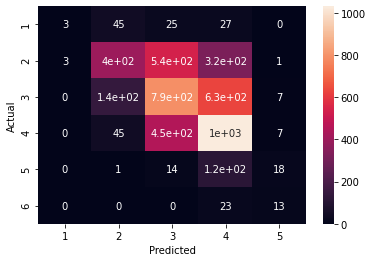

In [25]:
data_gs = {'y_Actual':   y_test_category_gs,
        'y_Predicted': y_pred_category_gs
        }

df_matrix_gs = pd.DataFrame(data_gs, columns=['y_Actual','y_Predicted'])
confusion_matrix_gs = pd.crosstab(df_matrix_gs['y_Actual'], df_matrix_gs['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_gs, annot=True)
plt.show()

In [26]:
df_matrix_gs = classification_report(y_test_category_gs,y_pred_category_gs)
print('Classification report : \n',df_matrix_gs)

Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.03      0.06       100
           2       0.63      0.31      0.42      1270
           3       0.43      0.50      0.47      1573
           4       0.48      0.67      0.56      1534
           5       0.39      0.12      0.18       149
           6       0.00      0.00      0.00        36

    accuracy                           0.48      4662
   macro avg       0.41      0.27      0.28      4662
weighted avg       0.50      0.48      0.46      4662

/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lina/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classifica

In [10]:
knn = KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1)
knn.fit(X_train, np.ravel(y_train))

KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=1)

In [11]:
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

0.5288508320525502


In [13]:
import pickle

# save the model to disk
filename = 'knn_fnn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [14]:
df3 = pd.read_csv("../data/train_means.csv")

In [15]:
df4 = df3.copy()

features_drop = ['target','Unnamed: 0','ID','location']
X=df4.drop(features_drop,axis=1)
y=df4['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
knn_mean = KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1)
knn_mean.fit(X_train, np.ravel(y_train))

KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=1)

In [18]:
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

0.4596746964620302


In [19]:
# save the model to disk
filename = 'knn_mean_model.sav'
pickle.dump(knn, open(filename, 'wb'))